*   Xinhao Lan(1082620)

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2022. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this this for some tasks.

The datasets are on Blackboard. Download the zip and make sure to put the files in the same directory as the notebook.

### Rules
* The lab exercises should be made in **groups of two people**.

* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be `lab1_id1_id2.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. 

* We may not grade all sub-questions (instead, we may choose a sub-set and scale the points). However, solve them as if they were.

Notes on implementation:

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `# YOUR CODE HERE` comment.
    
    * For theoretical questions, put your solution in the YOUR ANSWER HERE cell.
    
* Test your code and **make sure we can run your notebook**

In [3]:
print("Hello World!")

Hello World!


# 1. Penn treebank



## Exercise 1.1 
(40 points, 5 points per subquestion )

You are provided with a corpus containing words with their Part-of-Speech tags (POS-tags for short). The format is
**word|POS** (one sentence per line) and the file name is **sec02-21.gold.tagged**. This data is extracted from Sections 02-21 from the Penn Treebank: these sections are most commonly used for training statistical models like POS-taggers and parsers.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4)) holds a summary of POS-tags used in the Penn Treebank tagset together with their meaning and some examples. (If you are keen on learning more about the word-classes represented POS-tags and their definitions you can do a little reading ahead for next week and already have a look at section 8.1 of the same chapter).

**[Hint]** the Python library [collections](https://docs.python.org/3.7/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

**(a)** How large is the corpus? (i.e. how **many tokens**). And what is the size of the **vocabulary** used in this corpus? 

Estimate the vocabulary size both by **lowercasing** all the words as well as by leaving the words in their **original orthography**. What is an advantage of lowercasing all the words in your corpus? What is a notable downside? **Give examples.**

In [3]:
## YOUR CODE HERE ##
from collections import Counter
file = open('sec02-21.gold.tagged','r')
count = 0
Voc = []
Voc_NoPos = []
Voc_Lower = []
Voc_NoPos_Lower = []
for line in file:
  count = count + len(line.split())
  for word in line.split():
    Voc.append(word)
    Voc_NoPos.append(word.split("|",1)[0])
    Voc_Lower.append(word.lower())
    Voc_NoPos_Lower.append(word.split("|",1)[0].lower())
print("The total number of tokens is :", count)
print("")
count_Voc = Counter()
count_Voc_NoPos = Counter()
count_Voc_Lower = Counter()
count_Voc_NoPos_Lower = Counter()
for word in Voc:
  count_Voc[word]+=1
print("The size of the vocabulary with the original orthography and with POS is :", len(count_Voc))
for word in Voc_NoPos:
  count_Voc_NoPos[word]+=1
print("The size of the vocabulary with the original orthography and without POS is :", len(count_Voc_NoPos))
for word in Voc_Lower:
  count_Voc_Lower[word]+=1
print("The size of the vocabulary with all words lowercased and with POS  is :", len(count_Voc_Lower))
for word in Voc_NoPos_Lower:
  count_Voc_NoPos_Lower[word]+=1
print("The size of the vocabulary with all words lowercased and without POS is :", len(count_Voc_NoPos_Lower))

The total number of tokens is : 929552

The size of the vocabulary with the original orthography and with POS is : 51643
The size of the vocabulary with the original orthography and without POS is : 44210
The size of the vocabulary with all words lowercased and with POS  is : 48233
The size of the vocabulary with all words lowercased and without POS is : 39384


**Advantages:** The first word in one sentence should be capitalized and the meaning of that sentence is not changed. For example, here are two sentences: **"There is an apple."** and **"I notice there is an apple."** The meaning of **"There"** and **"there"** is completely same and should be seen as the same word in this corpus.

**Disadvantages:** Clearly, some words' meanings with capitalized letter are totally different from words without capitalized letter. Here are some examples:
*   May(month) - may(probably); March - march; August - august.
*   China(country) - china(porcelain); Japan - japan; Turkey - turkey.
*   Green(name) - green(color); Black - black; King - king.



------
For the rest of this exercise <font color="red">you should use the **original orthography**</font> of the data when answering the questions.

------


**(b)** Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**? For a better picture you might need to make the plot horizontally wide or consider an initial cutoff of ranked words. 

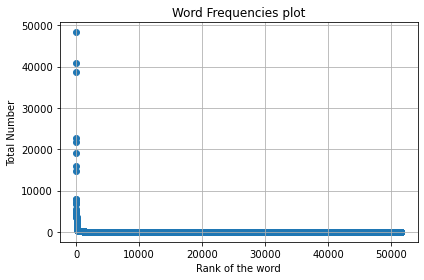

In [4]:
## YOUR CODE HERE ##
import numpy as np
import operator
Voc_Dict = dict(count_Voc)
Voc_Dict_Sorted = (sorted(Voc_Dict.items(), key = operator.itemgetter(1)))[::-1]
number = []
rank = []
wordRanked = []
i = 1
for key,value in Voc_Dict_Sorted:
  number.append(value)
  wordRanked.append(key)
  rank.append(i)
  i = i + 1

fig,ax = plt.subplots()
ax.scatter(rank, number)
ax.set_xlabel("Rank of the word")
ax.set_ylabel("Total Number")
ax.set_title("Word Frequencies plot")
ax.grid(True)
fig.tight_layout()
plt.show()

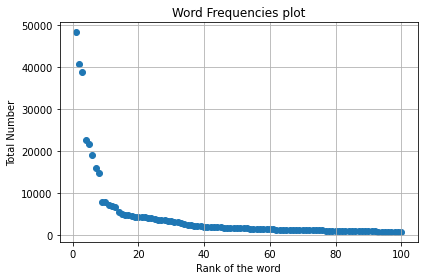

In [7]:
fig,ax = plt.subplots()
ax.scatter(rank[:100], number[:100])
ax.set_xlabel("Rank of the word")
ax.set_ylabel("Total Number")
ax.set_title("Word Frequencies plot")
ax.grid(True)
fig.tight_layout()
plt.show()

Zipf's law means that  *f x r ≈ k*. It is clear that this corpus obey Zipf’s law.

**(c)** What are the **20 most common words** in the corpus and how often do they occur? What is the 50th most common word, the 100th and the 1000th and how often do they occur?

In [8]:
## YOUR CODE HERE ##
print("The 20 most common words in the corpus and their frequency are:")
print(count_Voc.most_common(20))
print("")
print("The 50th most common word and its frequency is: ")
print(str(wordRanked[49]) +" "+ str(number[49]) + "\n")
print("The 100th most common word and its frequency is: ")
print(str(wordRanked[99]) +" "+ str(number[99]) + "\n")
print("The 1000th most common word and its frequency is: ")
print(str(wordRanked[999]) +" "+ str(number[999]) + "\n")

The 20 most common words in the corpus and their frequency are:
[(',|,', 48310), ('the|DT', 40831), ('.|.', 38798), ('of|IN', 22778), ('to|TO', 21676), ('a|DT', 19151), ('and|CC', 15901), ('in|IN', 14852), ("'s|POS", 8023), ('for|IN', 7907), ('$|$', 7125), ('is|VBZ', 6891), ('The|DT', 6753), ('said|VBD', 5476), ('on|IN', 4965), ('%|NN', 4866), ('that|IN', 4719), ('it|PRP', 4639), ('by|IN', 4438), ('from|IN', 4437)]

The 50th most common word and its frequency is: 
his|PRP$ 1688

The 100th most common word and its frequency is: 
companies|NNS 817

The 1000th most common word and its frequency is: 
pilots|NNS 106



To be more clear, the 20 most common words in the corpus and their frequency  are:

(',|,', 48310), ('the|DT', 40831), ('.|.', 38798), ('of|IN', 22778), ('to|TO', 21676), ('a|DT', 19151), ('and|CC', 15901), ('in|IN', 14852), ("'s|POS", 8023), ('for|IN', 7907), ('$|$', 7125), ('is|VBZ', 6891), ('The|DT', 6753), ('said|VBD', 5476), ('on|IN', 4965), ('%|NN', 4866), ('that|IN', 4719), ('it|PRP', 4639), ('by|IN', 4438), ('from|IN', 4437)

**(d)** How many different Part-of-speech tags are present in the corpus?

In [9]:
## YOUR CODE HERE ##
Pos = []
for word in wordRanked:
  Pos.append(word.split("|",1)[1])
    
count_Pos = Counter()
for word in Pos:
  count_Pos[word] += 1
    
print("The number of differnet Part-of-speech tags that are present in the corpus is:", len(count_Pos))

The number of differnet Part-of-speech tags that are present in the corpus is: 48


**(e)** Print a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, what are the **3 most common words** that belong to that class?

In [10]:
## YOUR CODE HERE ##
print("The 10 most commonly occurring POS tags in the data are: ", count_Pos.most_common(10))
for word in count_Pos.most_common(10):
  tag = word[0]
  t = 0
  print("\n3 most common words that belong to " + tag + " Pos tag.")
  for word in wordRanked:
    if(word.split("|",1)[1] == tag):
      print(word.split("|",1)[0])
      t += 1
      if(t==3):
        break

The 10 most commonly occurring POS tags in the data are:  [('NNP', 11346), ('NN', 9509), ('JJ', 8042), ('NNS', 4950), ('CD', 4734), ('VBN', 2146), ('VB', 2101), ('VBG', 2033), ('VBD', 1618), ('RB', 1335)]

3 most common words that belong to NNP Pos tag.
Mr.
U.S.
Corp.

3 most common words that belong to NN Pos tag.
%
company
year

3 most common words that belong to JJ Pos tag.
new
other
last

3 most common words that belong to NNS Pos tag.
years
shares
sales

3 most common words that belong to CD Pos tag.
million
billion
one

3 most common words that belong to VBN Pos tag.
been
expected
made

3 most common words that belong to VB Pos tag.
be
have
make

3 most common words that belong to VBG Pos tag.
being
including
according

3 most common words that belong to VBD Pos tag.
said
was
were

3 most common words that belong to RB Pos tag.
n't
also
not


**(f)** A single word may have several POS-tags. For example, *record* can be a both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This make POS-tags extremely useful for **disambiguation**.

What percentage(!) of the words in the vocabulary(!) is **ambiguous**? (i.e. have more than one POS tag?) What are the **10 most frequently shared POS tag pairs** (i.e. POS tag pairs that share most words)? Which words are **most ambiguous** (i.e. getting one of the largest sets(!) of POS tags)? Give 3-4 of them.

In [11]:
## YOUR CODE HERE ##
Word_Same_Pos = []
Word_Ambi = []
for word in wordRanked:
  Word_Same_Pos.append(word.split("|",1)[0])
count_Word_Same_Pos = Counter()
for word in Word_Same_Pos:
  count_Word_Same_Pos[word] += 1
for word in Word_Same_Pos:
  if((count_Word_Same_Pos[word] >= 2 )& (word not in Word_Ambi)):
    Word_Ambi.append(word)
print("The percentage of the ambiguous words is: ",round((len(Word_Ambi)/len(wordRanked))*100,2), "%\n")

Pos_Ami = []
for word_1 in Word_Ambi:
  tag =""
  for word in wordRanked:
    if(word_1 == word.split("|",1)[0]):
      tag = tag + word.split("|",1)[1] + "-"
  tag = tag[:-1]
  Pos_Ami.append(tag)

count_Pos_Ami = Counter()
for tag in Pos_Ami:
  count_Pos_Ami[tag] +=1

print("The 10 most frequently shared POS tag pairs are: ", count_Pos_Ami.most_common(10))
print("")
print("The 5 most ambiguous words are: ", count_Word_Same_Pos.most_common(4))

The percentage of the ambiguous words is:  11.53 %

The 10 most frequently shared POS tag pairs are:  [('NNP-NN', 422), ('VBN-VBD', 407), ('JJ-NN', 406), ('VBD-VBN', 365), ('VB-VBP', 304), ('NN-VB', 271), ('NNS-VBZ', 266), ('NN-JJ', 256), ('VBG-NN', 173), ('NN-VBG', 142)]

The 5 most ambiguous words are:  [('many', 7), ('down', 7), ('set', 7), ('open', 7)]


**(g)**  Print 3-4 of these words with their multiple POS-tags. **Explain the ambiguities**? Use [Figure 8.2](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4) mentioned above to interpret the POS-tags.

In [12]:
## YOUR CODE HERE ##
Ami_Word_List = ['many','open','down','set']
i = 1
for word_1 in Ami_Word_List:
  print("Ambiguous Words ", i, " ", word_1)
  for word in wordRanked:
    if word_1 == word.split("|",1)[0]:
      print(word.split("|",1)[1])
  i += 1


Ambiguous Words  1   many
JJ
NN
DT
RB
NP
VB
PDT
Ambiguous Words  2   open
JJ
VB
VBP
RB
NN
RP
VBZ
Ambiguous Words  3   down
RB
RP
IN
JJ
NN
VBP
RBR
Ambiguous Words  4   set
VBN
VBD
VB
NN
VBP
VBZ
JJ


Ambiguous Words 1: **many**

POS-tags: JJ, NN, DT, RB, NP, VB, PDT

If the Pos-tag is **JJ**, example can be **"There are many people."**.

If the Pos-tag is **NN**, example can be **"Trade is in the interest of the many."**.

Ambiguous Words 2: **open**

POS-tags: JJ, VB, VBP, RB, NN, RP, VBZ

If the Pos-tag is **JJ**, example can be **"An open door"**.

If the Pos-tag is **VB**, example can be **"Open your door"**.

If the Pos-tag is **RB**, example can be **"The pods broke open"**.

Ambiguous Words 3: **down**

POS-tags: RB, RP, IN, JJ, NN, VBP, RBR

If the Pos-tag is **RB**, example can be **"She looked down"**.

If the Pos-tag is **JJ**, example can be **"The down escalator"**.

If the Pos-tag is **IN**, example can be **"Up and down the stairs"**.


Ambiguous Words 4: **set**

POS-tags: VBN, VBD, VB, NN, VBP, VBZ, JJ

If the Pos-tag is **VB**, example can be **"They set the mug of tea down"**.

If the Pos-tag is **VBD**, example can be **"They set the cup of tea down before"**.

If the Pos-tag is **NN**, example can be **"A set of false teeth"**.

If the Pos-tag is **JJ**, example can be **"There is no set procedure"**.

**Note:** Some examples are from Google translate

**(h)** Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occuring words of the English language. What **percentage of the dataset is ambiguous**?

In [13]:
## YOUR CODE HERE ##
Number_Ambi = 0
for word in Voc_NoPos:
    if word in Word_Ambi:
        Number_Ambi = Number_Ambi + 1
print("The percentage of the dataset that is ambiguous is: ", round((Number_Ambi/ len(Voc_NoPos))*100, 2), "%")

The percentage of the dataset that is ambiguous is:  55.08 %


## Exercise 1.2 
(10 points, 5 per subquestion)

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

**(a)** What percentages of the **development vocabulary and data** are unseen? (i.e., token types and tokens that occur in the development data but not in the training data)? Percentages are calculated wrt the development vocabulary/data.

In [14]:
## YOUR CODE HERE ##
file_new = open('sec00.gold.tagged', 'r')
Voc_Dev = []
Voc_NoPos_Dev = []
for line in file_new:
  for word in line.split():
    Voc_Dev.append(word)
    Voc_NoPos_Dev.append(word.split("|")[0])

Number_Pos = 0
wordRanked_Dev = []
for i in range(len(Voc_Dev)):
  if not(Voc_Dev[i] in wordRanked):
    Number_Pos = Number_Pos + 1
    wordRanked_Dev.append(Voc_Dev[i])
print("The percentages of unseen words with POS is: ", round((Number_Pos/len(Voc_Dev))*100, 2), "%")


wordRanked_NoPos =[]
for word in wordRanked:
  wordRanked_NoPos.append(word.split("|")[0])
    
Number_NoPos = 0
for i in range(len(Voc_NoPos_Dev)):
  if not(Voc_NoPos_Dev[i] in wordRanked_NoPos):
    Number_NoPos = Number_NoPos + 1
print("The percentage of unseen words without POS is: ", round((Number_NoPos/len(Voc_NoPos_Dev))*100, 2), "%")


The percentages of unseen words with POS is:  4.36 %
The percentage of unseen words without POS is:  3.8 %


**(b)** What are the three **POS tag categories** that the most **unseen words** belong to?

In [ ]:
## YOUR CODE HERE ##
tags_Dev = []
for word in wordRanked_Dev:
  tags_Dev.append(word.split("|",1)[1])
count_tags_Dev = Counter()
for tag in tags_Dev:
  count_tags_Dev[tag] += 1

print("The three POS tag categories that the most unseen words belong to are:",
      count_tags_Dev.most_common(3)[0][0], ',' ,
      count_tags_Dev.most_common(3)[1][0], ',' ,
      count_tags_Dev.most_common(3)[2][0], '.')

The three POS tag categories that the most unseen words belong to are: NNP , JJ , NN .


# 2. Language Models

This part of the lab will be covered next week. If you have prior exposure to NLP, go ahead and finish this part! If you don't, start anyway, and this part will be clear after the lecture. 

Reference **chapter 3** of JM3 *Language Modeling with N-Grams*. 

----------

Models that assign **probabilities** to **sequences of words** are called language **language
modelels** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method (https://en.wikipedia.org/wiki/Maximum_likelihood_estimation). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$

## Exercise 2.1 
(25 points, 15 and 10 for a and b)

**(a) ** Complete the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

**(b) ** Extend the function above so that it accepts a parameter `k` for optional add-$k$ smoothing. 

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

**[Python hint]** The `collections` library has another useful datastructure: the `defaultdict`. Some example uses (learn more [here](https://realpython.com/python-defaultdict/) if needed):

In [5]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [ ]:
d = dict()
d["new key"]

KeyError: ignored

Other datatypes as `default_factory`:

In [ ]:
d = defaultdict(int)
d["new key"]

0

In [ ]:
d = defaultdict(list)
d["new key"]

[]

Converting an already existing `dict`:

In [ ]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [ ]:
d = defaultdict(10)

TypeError: ignored

Use a `lambda` to make the number `10` `callable`":

In [ ]:
d = defaultdict(lambda: 10)
d["new key"]

10

In [ ]:
d = defaultdict(lambda: defaultdict(float))
d["new key"]

defaultdict(float, {})

Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    ngram = defaultdict(lambda: k/(N+kV), ngram)

The following function is given:

In [12]:
train_file = "ted-train.txt"

def read(fname, max_lines=np.inf):
    """
    Reads in the data in fname and returns it as
    one long list of words. Also returns a vocabulary in
    the form of a word2index and index2word dictionary.
    """
    data = []
    # w2i will automatically keep a counter to asign to new words
    w2i = defaultdict(lambda: len(w2i))
    i2w = dict()
    start = "<s>"
    end = "</s>"
    
    with open(fname, "r", encoding = 'UTF-8') as fh:
        for k, line in enumerate(fh):
            if k > max_lines:
                break
            words = line.strip().split()
            # assign an index to each word
            for w in words:
                i2w[w2i[w]] = w # trick
            
            sent = [start] + words + [end]
            data.append(sent)

    return data, w2i, i2w

In [14]:
def train_ngram(data, N, k=0):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionaly returns the unigram model
    
    :param data: text-data as returned by read
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """
    ngram = defaultdict(Counter) # ngram[history][word] = #(history,word)
    #unigram = defaultdict(float, Counter(data)) # default prob is 0.0           

    ## YOUR CODE HERE ##
    data_new = []
    for line in data:
        for word in line:
            data_new.append(word)
    count_unigram = Counter()
    count_ngram = defaultdict(Counter)
    for word in data_new:
        count_unigram[word] += 1
    V = len(count_unigram)
    ngram = defaultdict(lambda: defaultdict(lambda: k / (N + k * V)))  
    unigram = defaultdict(lambda: k / (N + k * V))
    sum_unigram = sum(count_unigram.values())
    for word in data_new:
        unigram[word] = (count_unigram[word] + k)/(sum_unigram + N + k * V)
    if(N == 2):
        word_1 = data_new[0]
        for word_2 in data_new[1:]:
            count_ngram[word_1][word_2] += 1
            word_1 = word_2
        #counts_ngram = count_ngram
        word_1 = data_new[0]
        for word_2 in data_new[1:]:
            ngram[word_1][word_2] = (count_ngram[word_1][word_2] + k)/(sum(count_ngram[word_1].values()) + N + k * V)
            word_1 = word_2
    elif(N == 3):
        word_1 = data_new[0]
        word_2 = data_new[1]
        for word_3 in data_new[2:]:
            count_ngram[word_1+ " " + word_2][word_3] += 1
            word_1 = word_2
            word_2 = word_3
          #counts_ngram = count_ngram
        word_1 = data_new[0]
        word_2 = data_new[1]
        for word_3 in data_new[2:]:
            ngram[word_1 + " " + word_2][word_3] = (count_ngram[word_1 + " " + word_2][word_3] + k)/(sum(count_ngram[word_1 + " " + word_2].values()) + N + k * V)
            word_1 = word_2
            word_2 = word_3
    elif(N == 4):
        word_1 = data_new[0]
        word_2 = data_new[1]
        word_3 = data_new[2]
        for word_4 in data_new[3:]:
            count_ngram[word_1+ " " + word_2 + " " + word_3][word_4] += 1
            word_1 = word_2
            word_2 = word_3
            word_3 = word_4
        #counts_ngram = count_ngram
        word_1 = data_new[0]
        word_2 = data_new[1]
        word_3 = data_new[2]
        for word_4 in data_new[3:]:
            ngram[word_1+ " " + word_2 + " " + word_3][word_4] = (count_ngram[word_1+ " " + word_2 + " " + word_3][word_4] + k)/(sum(count_ngram[word_1+ " " + word_2 + " " + word_3].values()) + N + k * V)
            word_1 = word_2
            word_2 = word_3
            word_3 = word_4
    return ngram, unigram

data, w2i, i2w = read(train_file)
bigram, unigram = train_ngram(data, N=2, k=0)
#print(bigram, unigram)
trigram, unigram = train_ngram(data, N=3, k=0)
#print(trigram, unigram)
quadgram, unigram = train_ngram(data, N=4, k=0)
#print(quadgram, unigram)
#bigram_smoothed, unigram_smoothed = train_ngram(data, N=2, k=1)
#print(bigram_smoothed, unigram_smoothed)
#trigram_smoothed, unigram_smoothed = train_ngram(data, N=3, k=1)
#print(trigram_smoothed, unigram_smoothed)
#quadgram_smoothed, unigram_smoothed = train_ngram(data, N=4, k=1)
#print(quadgram_smoothed, unigram_smoothed)

In [ ]:
data[2]

['<s>',
 'Both',
 'are',
 'necessary',
 ',',
 'but',
 'it',
 'can',
 'be',
 'too',
 'much',
 'of',
 'a',
 'good',
 'thing',
 '.',
 '</s>']

## Exercise 2.2 (5 points)

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependecies that occur in actual sentences and the better your changes are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training-set.

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a sentence by **sampling** from the language model.

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [17]:
from random import random
from collections import Counter

P = [0.2,0.5,0.2,0.1]

def sample(P):
    u = random() # uniformly random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        p += p_i
        
print(sample(P))

print(Counter([sample(P) for i in range(1000)])) # check to see if the law of large numbers is still true

3
Counter({2: 510, 1: 212, 3: 175, None: 103})


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, section 4.3)

In [15]:
from random import choice
def generate_sent(lm, N):
    ## YOUR CODE HERE ##
    sent = []
    insert_word = "<s>"
    if(N == 1):
        sent.sppend(insert_word)
        words = list(lm.keys())
        probs = list(lm.values())
        while(insert_word != "</s>"):
            k = sample(probs)
            if k == None:
                insert_word = "</s>"
            else:
                insert_word = words[k]
            sent.append(insert_word)
    elif(N == 2):
        sent.append(insert_word)
        while(insert_word != "</s>"):
            words=list(lm[insert_word].keys())
            probs=list(lm[insert_word].values())
            k = sample(probs)
            if k == None:
                insert_word = "</s>"
            else:
                insert_word = words[k]
            sent.append(insert_word)
    elif(N == 3):
        sent.append(insert_word)
        temp = []
        for k in lm.keys(): 
            if(k.split(" ",1)[0] == "<s>"):
                temp.append(k.split(" ",1)[1])
        Totalsum = 0 
        for new_word in temp:
            Totalsum += sum(lm[insert_word + " " + new_word].values())
        probs =[sum(lm[insert_word + " " + new_word].values()) / Totalsum for new_word in temp]
        insert_word_2 = temp[sample(probs)]
        sent.append(insert_word_2)
        while(insert_word != "</s>"):
            words = list(lm[insert_word +  " " + insert_word_2].keys())
            probs = list(lm[insert_word +  " " + insert_word_2].values())
            insert_word = insert_word_2
            k = sample(probs)
            if k == None:
                insert_word_2 = "</s>"
            else:
                insert_word_2 = words[k]
            sent.append(insert_word_2)
    elif(N == 4):
        sent.append(insert_word)
        temp = []
        for k in lm.keys(): 
            if(k.split(" ",2)[0] == "<s>"):
                temp.append(k.split(" ",1)[1])
        temp_1 = choice(temp)
        insert_word_2, insert_word_3 = temp_1.split(" ",1)[0], temp_1.split(" ",1)[1]
        sent.append(insert_word_2)
        sent.append(insert_word_3)
        while(insert_word_3 != "</s>"):
            words=list(lm[insert_word + " " + insert_word_2 + " " + insert_word_3].keys())
            probs=list(lm[insert_word + " " + insert_word_2 + " " + insert_word_3].values())
            insert_word = insert_word_2
            insert_word_2 = insert_word_3
            k = sample(probs)
            if k == None:
                insert_word_3 = "</s>"
            else:
                insert_word_3 = words[k]
            sent.append(insert_word_3)
 
    return " ".join(sent)
    
    

In [18]:
bigram, unigram = train_ngram(data, N=2, k=0)
print(generate_sent(bigram, 2))

<s> If Africa </s>


In [27]:
trigram, unigram = train_ngram(data, N=3, k=0)
#print(generate_sent(bigram, 3))

In [19]:
quadgram, unigram = train_ngram(data, N=4, k=0)
print(generate_sent(quadgram, 4))

<s> Like endocrinal </s>


### [Extra]

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [28]:
count_sum_1 = defaultdict(float)
count_max_1 = defaultdict(float)
count_sum_2 = defaultdict(float)
count_max_2 = defaultdict(float)
count_sum_3 = defaultdict(float)
count_max_3 = defaultdict(float)
for line in data:
    for i in range(len(line)):
        if i>0:
            if count_sum_1[line[i]] == 0.0:
                count_sum_1[line[i]] = sum(bigram[line[i]].values())
            if count_max_1[line[i]] == 0.0:
                count_max_1[line[i]] = len(bigram[line[i]])
        if i>1:
            if count_sum_2[line[i-1] + " " + line[i]] == 0.0:
                count_sum_2[line[i-1] + " " + line[i]] = sum(trigram[line[i-1] + " " + line[i]].values())
            if count_max_2[line[i-1] + " " + line[i]] == 0.0:
                count_max_2[line[i-1] + " " + line[i]] = len(trigram[line[i-1] + " " + line[i]])  
        if i>2:
            if count_sum_3[line[i-2] + " " + line[i-1] + " " + line[i]] == 0.0:
                count_sum_3[line[i-2] + " " + line[i-1] + " " + line[i]] = sum(quadgram[line[i-2] + " " + line[i-1] + " " + line[i]].values())
            if count_max_3[line[i-2] + " " + line[i-1] + " " + line[i]] == 0.0:
                count_max_3[line[i-2] + " " + line[i-1] + " " + line[i]] = len(quadgram[line[i-2] + " " + line[i-1] + " " + line[i]])

In [36]:
bicount =0
bimax = 0
maxb_comp = 'Null'
max_pro_1 = 0.0
for k in count_sum_1.keys():
    if max_pro_1 < count_sum_1[k]:
        max_pro_1 = count_sum_1[k]
    if count_sum_1[k]==1.0:
        bicount +=1
    if bimax < count_max_1[k]:
        bimax = count_max_1[k]
        maxb_comp = k
tricount =0
trimax = 0
maxt_comp = 'Null'
max_pro_2 = 0.0
for k in count_sum_2.keys():
    if max_pro_2 < count_sum_2[k]:
        max_pro_2 = count_sum_2[k]
    if count_sum_2[k]==1.0:
        tricount +=1
    if trimax < count_max_2[k]:
        trimax = count_max_2[k]
        maxt_comp = k
qcount =0
qmax = 0
maxq_comp = 'Null'
max_pro_3 = 0.0
for k in count_sum_3.keys():
    if max_pro_3 < count_sum_3[k]:
        max_pro_3 = count_sum_3[k]
    if count_sum_3[k]==1.0:
        qcount +=1
    if qmax < count_max_3[k]:
        qmax = count_max_3[k]
        maxq_comp = k
        

#prints for 1 question        
print("Bigram: " + str(bicount/len(count_sum_1.keys())))
print("Trigram: " + str(tricount/len(count_sum_2.keys())))
print("Quadgram: "+ str(qcount/len(count_sum_3.keys())))
print("Max bigram probability: " + str(max_pro_1))
print("Max trigram probability: " + str(max_pro_2))
print("Max quadgram probability: " + str(max_pro_3))
#prints for 2 question
print("Bigram history with most continuations is '"+ maxb_comp +"' with "+ str(bimax))
print("Trigram history with most continuations is '"+ maxt_comp +"' with "+ str(trimax))
print("Quadram history with most continuations is '"+ maxq_comp +"' with "+ str(qmax))


Bigram: 0.0
Trigram: 0.0
Quadgram: 0.0
Max bigram probability: 0.9999933598492974
Max trigram probability: 0.9999887391614429
Max quadgram probability: 0.9992499531220701
Bigram history with most continuations is 'the' with 19019
Trigram history with most continuations is 'of the' with 5437
Quadram history with most continuations is ', and the' with 1324


## Excercise 2.3 (5 points)

Let $V$ denote our vocabulary. Recall that for any $w$ in $V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) \geq 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots shows $p(v|word)$ for the `k` words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

**(a)** Use this function to plot the distribution for at least two words `w` and answer the questions
* What is the effect of smoothing on the bigram distribution of frequent words? 
* What is the effect in the case of infrequent words?
* Explain the difference between the two based on the raw counts of `w` 

**(b)** Now experiment with $k$ much smaller than 1 (but greater than 0!) 
* What are the effects?


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

What happens when $C(w_{n-1})$ is relatively big (similiar in of size as $ |V| $)? And what if $C(w_{n-1})$ is small? 

In [48]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, k=30):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:k]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:k]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case  probs is generally less than k long
    probs = probs + (0,) * (k-len(probs)) 

    w_data = pd.DataFrame({"w": smooth_ws * 2,
                           "P({}|w)".format(word): probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*k + ["smoothed"]*k})
    
    fig, ax = plt.subplots(figsize=(10,10))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x="w", y="P({}|w)".format(word), hue="smoothing",
                    data=w_data, palette="Blues_d")    

In [40]:
bigram_smoothed1, unigram_smoothed1 = train_ngram(data, N=2, k=1)
trigram_sm, unigram = train_ngram(data, N=3, k=1)

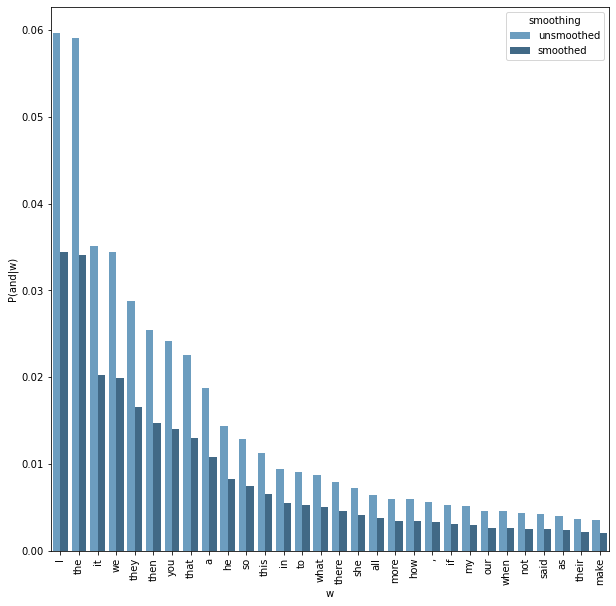

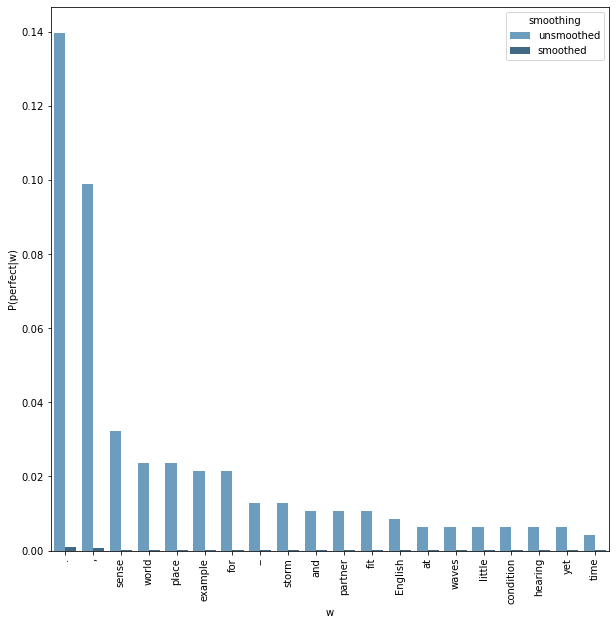

In [49]:
## YOUR CODE HERE ##
plot_bigram_dist("and", bigram, bigram_smoothed1)
plot_bigram_dist("perfect", bigram, bigram_smoothed1, k=20)

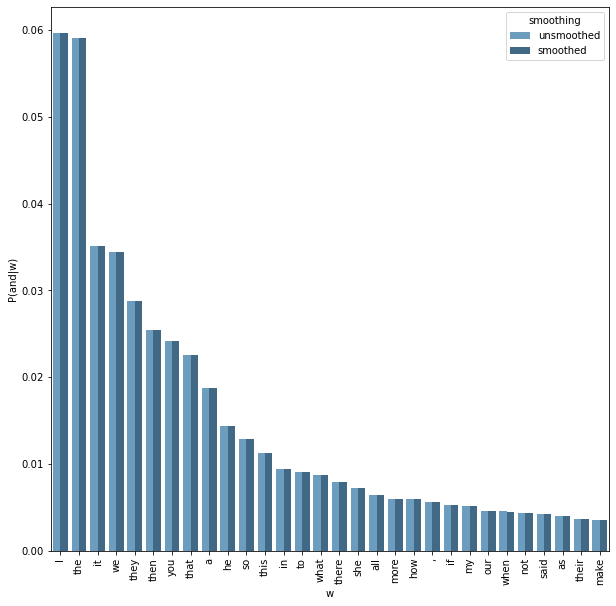

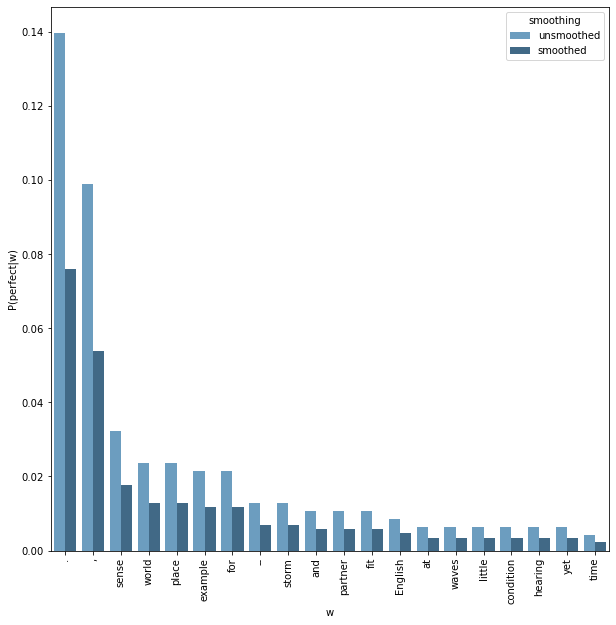

In [50]:
bigram_smoothed_2, unigram_smoothed_2 = train_ngram(data, N=2, k=0.005)
bigram_smoothed_3, unigram_smoothed_3 = train_ngram(data, N=2, k=0.0008)
plot_bigram_dist("and", bigram,bigram_smoothed_3)
plot_bigram_dist("perfect", bigram,bigram_smoothed_2, k=20)

In [51]:
count_1 = 0
count_2 = 0
for line in data:
    for word in line:
        if word == 'and':
            count_1 += 1
        if word == 'perfect':
            count_2 += 1
print('Count number for and:', count_1)
print('Count number for perfect:', count_2)

Count number for and: 106129
Count number for perfect: 463


**Question(a)-1:** What is the effect of smoothing on the bigram distribution of frequent words?

**Answer(a)-1:**

**Question(a)-2:** What is the effect in the case of infrequent words?

**Answer(a)-2:**

**Question(a)-3:** Explain the difference between the two based on the raw counts of w

**Answer(a)-3:**

**Question(b):** What are the effects?

**Answer(b):**

**Question(c):** What happens when 𝐶(𝑤𝑛−1) is relatively big (similiar in of size as |𝑉|)? And what if 𝐶(𝑤𝑛−1) is small?

**Answer(c):**


**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_i|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_{N-1}|w_1\dots w_{N-2})\prod_{i=N}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

## Exercise 2.4 (5 points)

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought 
       together in a collision , producing a burst of pure energy .

**Repeat** this with the **smoothed (add-1)** versions of the N-grams. What is the effect of smoothing on the probabilities?


In [42]:
## YOUR CODE HERE ##
sentence1 = "<s> Every day was about creating something new . </s>"
sentence2 = "<s> In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . </s>"
sent1 = sentence1.split(" ")
sent2 = sentence2.split(" ")
prob_uni1 =1
prob_bi1 = 1
prob_tri1 = 1
for i in range(len(sent1)):
    prob_uni1 = unigram[sent1[i]] * prob_uni1
    if i>=1:
        prob_bi1 = bigram[sent1[i-1]][sent1[i]] * prob_bi1
    if i>=2:
        prob_tri1 = trigram[sent1[i-2]+" "+ sent1[i-1]][sent1[i]] * prob_tri1
prob_uni2 =1
prob_bi2 = 1
prob_tri2 = 1
for i in range(len(sent2)):
    prob_uni2 = unigram[sent2[i]] * prob_uni2
    if i>=1:
        prob_bi2 = bigram[sent2[i-1]][sent2[i]] * prob_bi2
    if i>=2:
        prob_tri2 = trigram[sent2[i-2]+" "+ sent2[i-1]][sent2[i]] * prob_tri1

print("Language Models without smoothing for first sentence(order N=1,N=2,N=3)")
print(prob_uni1)
print(prob_bi1)
print(prob_tri1)
print("Language Models without smoothing for second sentence(order N=1,N=2,N=3)")
print(prob_uni2)
print(prob_bi2)
print(prob_tri2)

prob_uni1sm =1
prob_bi1sm = 1
prob_tri1sm = 1
for i in range(len(sent1)):
    prob_uni1sm = unigram_smoothed1[sent1[i]] * prob_uni1sm
    if i>=1:
        prob_bi1sm = bigram_smoothed1[sent1[i-1]][sent1[i]] * prob_bi1sm
    if i>=2:
        prob_tri1sm = trigram_sm[sent1[i-2]+" "+ sent1[i-1]][sent1[i]] * prob_tri1sm
prob_uni2sm =1
prob_bi2sm = 1
prob_tri2sm = 1
for i in range(len(sent2)):
    prob_uni2sm = unigram_smoothed1[sent2[i]] * prob_uni2sm
    if i>=1:
        prob_bi2sm = bigram_smoothed1[sent2[i-1]][sent2[i]] * prob_bi2sm
    if i>=2:
        prob_tri2sm = trigram_sm[sent2[i-2]+" "+ sent2[i-1]][sent2[i]] * prob_tri1sm
        
print("Language Models with smoothing for first sentence(order N=1,N=2,N=3)")
print(prob_uni1sm)
print(prob_bi1sm)
print(prob_tri1sm)
print("Language Models with smoothing for second sentence(order N=1,N=2,N=3)")
print(prob_uni2sm)
print(prob_bi2sm)
print(prob_tri2sm)

Language Models without smoothing for first sentence(order N=1,N=2,N=3)
7.628903566470952e-27
4.6227147955983436e-17
4.257773435434731e-09
Language Models without smoothing for second sentence(order N=1,N=2,N=3)
4.109472785115007e-102
4.761675331303943e-73
4.196066574051619e-09
Language Models with smoothing for first sentence(order N=1,N=2,N=3)
7.628916963308627e-27
1.3640114506184915e-26
1.2867054053522486e-32
Language Models with smoothing for second sentence(order N=1,N=2,N=3)
4.1094973212476584e-102
1.554402615379383e-116
3.381118877345232e-35


First sentence, N = 1, without smoothing: 7.628903566470952e-27

First sentence, N = 1, with smoothing: 7.628916963308627e-27

First sentence, N = 2, without smoothing: 4.6227147955983436e-17

First sentence, N = 2, with smoothing: 1.3640114506184915e-26

First sentence, N = 3, without smoothing: 4.257773435434731e-09

First sentence, N = 3, with smoothing: 1.2867054053522486e-32

Second sentence, N = 1, without smoothing: 4.109472785115007e-102

Second sentence, N = 1, with smoothing: 4.1094973212476584e-102

Second sentence, N = 2, without smoothing: 4.761675331303943e-73

Second sentence, N = 2, with smoothing: 1.554402615379383e-116

Second sentence, N = 3, without smoothing: 4.196066574051619e-09

Second sentence, N = 3, with smoothing: 3.381118877345232e-35

When N = 1, for both sentences, the probability is almost the same. During other situations, the probabilities of the unsmoothed models are higher than the probabilities of the smoothed ones.

## Exercise 2.5 (5 points)

The above sentences were taken from the training set, hence they will all have probability greater than 0. The big challenge for our language model are of course with sentence that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following three senteces are taken from the **test set** availlable in the file **ted-test.txt**. What probabilities do your smoothed and unsmoothed language models asign in this case?

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every 
       conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible 
       reality .

In [43]:
### YOUR CODE HERE ###
sent1 = "<s> Because these robots are really safe . </s>"
sent2 = "<s> We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality . </s>"
sent1 = sent1.split(" ")
sent2 = sent2.split(" ")
prob_uni1 =1
prob_bi1 = 1
prob_tri1 = 1
for i in range(len(sent1)):
    prob_uni1 = unigram[sent1[i]] * prob_uni1
    if i>=1:
        prob_bi1 = bigram[sent1[i-1]][sent1[i]] * prob_bi1
    if i>=2:
        prob_tri1 = trigram[sent1[i-2]+" "+ sent1[i-1]][sent1[i]] * prob_tri1
prob_uni2 =1
prob_bi2 = 1
prob_tri2 = 1
for i in range(len(sent2)):
    prob_uni2 = unigram[sent2[i]] * prob_uni2
    if i>=1:
        prob_bi2 = bigram[sent2[i-1]][sent2[i]] * prob_bi2
    if i>=2:
        prob_tri2 = trigram[sent2[i-2]+" "+ sent2[i-1]][sent2[i]] * prob_tri1
        
print("Language Models without smoothing for first sentence(order N=1,N=2,N=3)")
print(prob_uni1)
print(prob_bi1)
print(prob_tri1)
print("Language Models without smoothing for second sentence(order N=1,N=2,N=3)")
print(prob_uni2)
print(prob_bi2)
print(prob_tri2)

prob_uni1sm =1
prob_bi1sm = 1
prob_tri1sm = 1
for i in range(len(sent1)):
    prob_uni1sm = unigram_smoothed1[sent1[i]] * prob_uni1sm
    if i>=1:
        prob_bi1sm = bigram_smoothed1[sent1[i-1]][sent1[i]] * prob_bi1sm
    if i>=2:
        prob_tri1sm = trigram_sm[sent1[i-2]+" "+ sent1[i-1]][sent1[i]] * prob_tri1sm
prob_uni2sm =1
prob_bi2sm = 1
prob_tri2sm = 1
for i in range(len(sent2)):
    prob_uni2sm = unigram_smoothed1[sent2[i]] * prob_uni2sm
    if i>=1:
        prob_bi2sm = bigram_smoothed1[sent2[i-1]][sent2[i]] * prob_bi2sm
    if i>=2:
        prob_tri2sm = trigram_sm[sent2[i-2]+" "+ sent2[i-1]][sent2[i]] * prob_tri1sm
        
print("Language Models with smoothing for first sentence(order N=1,N=2,N=3)")
print(prob_uni1sm)
print(prob_bi1sm)
print(prob_tri1sm)
print("Language Models with smoothing for second sentence(order N=1,N=2,N=3)")
print(prob_uni2sm)
print(prob_bi2sm)
print(prob_tri2sm)

Language Models without smoothing for first sentence(order N=1,N=2,N=3)
3.1752657324256928e-24
2.660588472701394e-15
0.0
Language Models without smoothing for second sentence(order N=1,N=2,N=3)
3.609529174869051e-120
0.0
0.0
Language Models with smoothing for first sentence(order N=1,N=2,N=3)
3.1752707507961485e-24
7.25807027066009e-24
5.737985872887042e-31
Language Models with smoothing for second sentence(order N=1,N=2,N=3)
3.60955452918289e-120
1.4189813501695615e-126
1.3903937664756158e-33


First sentence, N = 1, without smoothing: 3.1752657324256928e-24

First sentence, N = 1, with smoothing: 3.1752707507961485e-24

First sentence, N = 2, without smoothing: 2.660588472701394e-15

First sentence, N = 2, with smoothing: 7.25807027066009e-24

First sentence, N = 3, without smoothing: 0.0

First sentence, N = 3, with smoothing: 5.737985872887042e-31

Second sentence, N = 1, without smoothing: 3.609529174869051e-120

Second sentence, N = 1, with smoothing: 3.60955452918289e-120

Second sentence, N = 2, without smoothing: 0.0

Second sentence, N = 2, with smoothing: 1.4189813501695615e-126

Second sentence, N = 3, without smoothing: 0.0

Second sentence, N = 3, with smoothing: 1.3903937664756158e-33

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [45]:
### ANSWER HERE ###
data_t, w2i_t, i2w_t = read('ted-test.txt') #read the file
bigram_smoothed_new, unigram_smoothed_new = train_ngram(data, N=2, k=0.0008)
uni = 0
uni_sm = 0
bi = 0
bi_sm = 0
tri = 0
tri_sm = 0
for words in data_t:
    prob_uni = 1
    prob_bi = 1
    prob_tri = 1
    prob_unism = 1
    prob_bism = 1
    prob_trism = 1
    for i in range(len(words)):
        prob_uni = unigram[words[i]] * prob_uni
        prob_unism = unigram_smoothed_new[words[i]] * prob_unism
        if i>=1:
            prob_bi = bigram[words[i-1]][words[i]] * prob_bi
            prob_bism = bigram_smoothed_new[words[i-1]][words[i]] * prob_bism
        if i>=2:
            prob_tri = trigram[words[i-2]+" "+ words[i-1]][words[i]] * prob_tri
            prob_trism = trigram_sm[words[i-2]+" "+ words[i-1]][words[i]] * prob_trism
    if prob_uni ==0 :
        uni +=1
    if prob_bi ==0 :
        bi +=1
    if prob_tri ==0 :
        tri +=1
    if prob_unism ==0 :
        uni_sm +=1
    if prob_bism ==0 :
        bi_sm +=1
    if prob_trism ==0 :
        tri_sm +=1
print("Unigram : " + str(uni/len(data_t)))
print("Bigram : " + str(bi/len(data_t)))
print("Trigram : " + str(tri/len(data_t)))
print("Unigram Smoothed : " + str(uni_sm/len(data_t)))
print("Bigram Smoothed : " + str(bi_sm/len(data_t)))
print("Trigram Smoothed : " + str(tri_sm/len(data_t)))

Unigram : 0.0
Bigram : 0.7132867132867133
Trigram : 0.8916083916083916
Unigram Smoothed : 0.0
Bigram Smoothed : 0.0
Trigram Smoothed : 0.0034965034965034965


## Exercise 2.6 (5 points)

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) artithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the training sentences from excercise 2.1. What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?

In [46]:
### YOUR CODE HERE ###
P1 =[]
P2 = []
P3 = []
P4 = []
PP1 = []
PP2 = []
PP3 = []
PP4 = []
for words in data:
    Pn1 = 1
    Pn2 = 1
    Pn3 = 1
    Pn4 = 1
    for i in range(len(words)):
        Pn1 = Pn1 *unigram[words[i]]
        if i>0:
            Pn2 = Pn2 * bigram[words[i-1]][words[i]]
        if i>1:
            Pn3 = Pn3 * trigram[words[i-2] + " " + words[i-1]][words[i]]
        if i>2:
            Pn4 = Pn4 * quadgram[words[i-3] + " "+ words[i-2] + " " + words[i-1]][words[i]]
        if i == len(words)-1:
            P1.append(Pn1)
            PP1.append(Pn1**(-1/len(words)) if Pn1 != 0 else 0)
            P2.append(Pn2)
            PP2.append(Pn2**(-1/len(words)) if Pn2 != 0 else 0)
            P3.append(Pn3)
            PP3.append(Pn3**(-1/len(words)) if Pn3 != 0 else 0)
            P4.append(Pn4)
            PP4.append(Pn4**(-1/len(words)) if Pn4 != 0 else 0)
            
for i in range(10):
    print(data[i])
    print(P1[i],PP1[i])
    print(P2[i],PP2[i])
    print(P3[i],PP3[i])
    print(P4[i],PP4[i])

['<s>', 'Here', 'are', 'two', 'reasons', 'companies', 'fail', ':', 'they', 'only', 'do', 'more', 'of', 'the', 'same', ',', 'or', 'they', 'only', 'do', 'what', "'s", 'new', '.', '</s>']
2.5367111853835893e-65 383.5563340176096
6.372455067420436e-48 77.23741472306979
5.453995871880849e-32 17.80456665296834
5.784680949966289e-20 5.8817806404813044
['<s>', 'To', 'me', 'the', 'real', ',', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', ':', 'exploration', 'and', 'exploitation', '.', '</s>']
1.4947414728767185e-75 984.0504326384658
2.610548914437361e-54 139.10115195961973
9.251353707618525e-27 10.998964202219433
9.7727081854066e-18 4.790704711929166
['<s>', 'Both', 'are', 'necessary', ',', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing', '.', '</s>']
4.905910813840704e-43 308.1634993707003
7.410519193884516e-26 30.077670535673615
1.1580949433204975e-16 8.658184055618948
4.3826016703124964e-13 5.3328

YOUR ANSWER HERE

# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will asign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to asign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is so-called **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best performing N-gram smoothing methods, and up to a few years ago a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state of the art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving  vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vectors $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transforamtion. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))


Acknowledgements: Most of this lab was developed in collabnoration with Joost Bastings and Dan Douwe.